In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler


#import optuna

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv("file:///F:/parkinsons.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

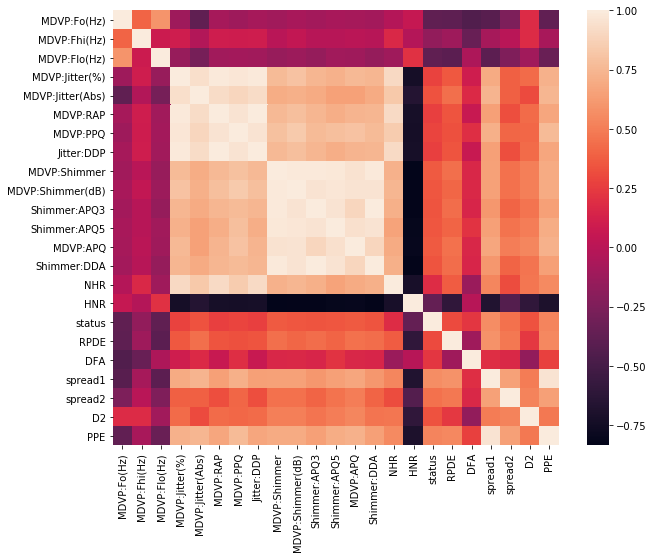

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [24]:
# show in details which feature is correlated with

CORR_THRESHOLD = 0.6 # threshold can be changed here

corr_data = df.corr()

highly_correlated_features = []

for feature in df.columns:
    if feature == 'status' or feature == 'name':
        continue
    for feature_index in df.columns:
        if feature_index == 'status' or feature_index == 'name':
            continue
        if feature == feature_index:
            continue
        if corr_data[feature][feature_index] > CORR_THRESHOLD:
            tupla = (feature,feature_index)
            reversed_tupla = (feature_index, feature)
            if reversed_tupla in highly_correlated_features:
                continue
            highly_correlated_features.append((feature,feature_index))
            
highly_correlated_features

[('MDVP:Jitter(%)', 'MDVP:Jitter(Abs)'),
 ('MDVP:Jitter(%)', 'MDVP:RAP'),
 ('MDVP:Jitter(%)', 'MDVP:PPQ'),
 ('MDVP:Jitter(%)', 'Jitter:DDP'),
 ('MDVP:Jitter(%)', 'MDVP:Shimmer'),
 ('MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'),
 ('MDVP:Jitter(%)', 'Shimmer:APQ3'),
 ('MDVP:Jitter(%)', 'Shimmer:APQ5'),
 ('MDVP:Jitter(%)', 'MDVP:APQ'),
 ('MDVP:Jitter(%)', 'Shimmer:DDA'),
 ('MDVP:Jitter(%)', 'NHR'),
 ('MDVP:Jitter(%)', 'spread1'),
 ('MDVP:Jitter(%)', 'PPE'),
 ('MDVP:Jitter(Abs)', 'MDVP:RAP'),
 ('MDVP:Jitter(Abs)', 'MDVP:PPQ'),
 ('MDVP:Jitter(Abs)', 'Jitter:DDP'),
 ('MDVP:Jitter(Abs)', 'MDVP:Shimmer'),
 ('MDVP:Jitter(Abs)', 'MDVP:Shimmer(dB)'),
 ('MDVP:Jitter(Abs)', 'Shimmer:APQ3'),
 ('MDVP:Jitter(Abs)', 'Shimmer:APQ5'),
 ('MDVP:Jitter(Abs)', 'MDVP:APQ'),
 ('MDVP:Jitter(Abs)', 'Shimmer:DDA'),
 ('MDVP:Jitter(Abs)', 'NHR'),
 ('MDVP:Jitter(Abs)', 'spread1'),
 ('MDVP:Jitter(Abs)', 'PPE'),
 ('MDVP:RAP', 'MDVP:PPQ'),
 ('MDVP:RAP', 'Jitter:DDP'),
 ('MDVP:RAP', 'MDVP:Shimmer'),
 ('MDVP:RAP', 'MDVP:Shimmer(

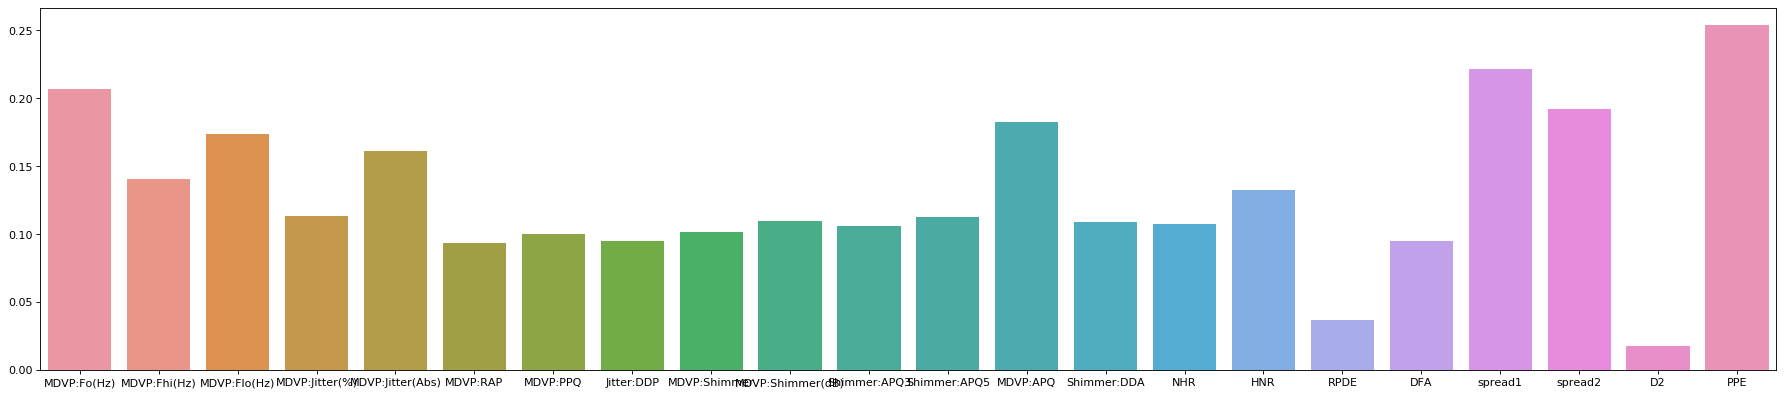

In [25]:
# mutual info classification
from sklearn.feature_selection import mutual_info_classif

X = df.drop(['name','status'], axis=1)
y = df['status']

mutual_info = mutual_info_classif(X,y)
# print of mutual_info
from matplotlib.pyplot import figure

figure(figsize=(28, 6), dpi=80)
sns.barplot(X.columns, mutual_info);

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


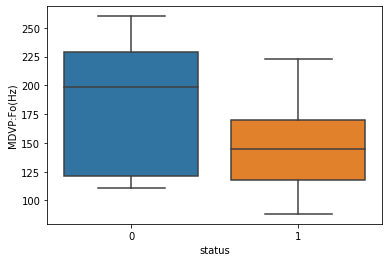

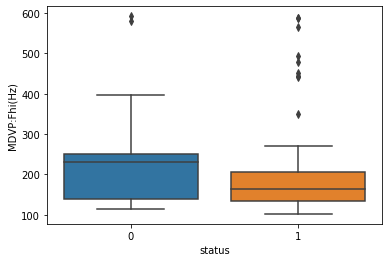

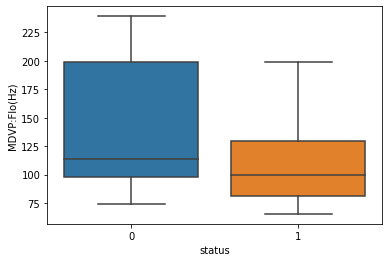

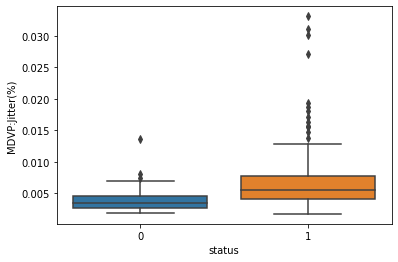

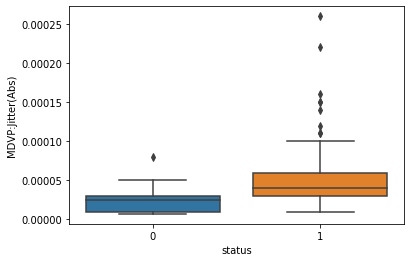

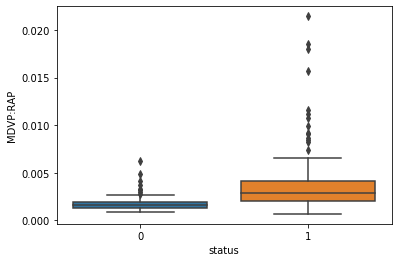

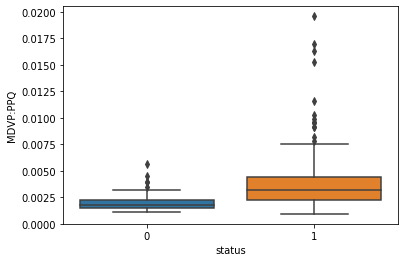

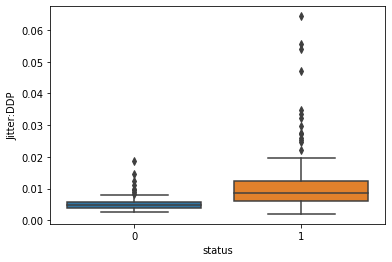

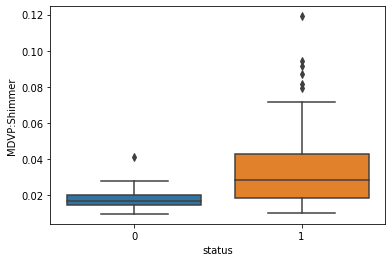

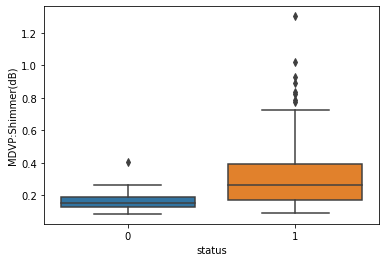

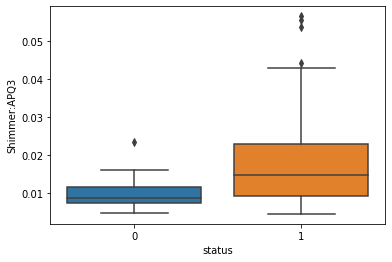

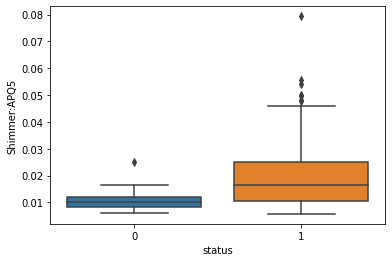

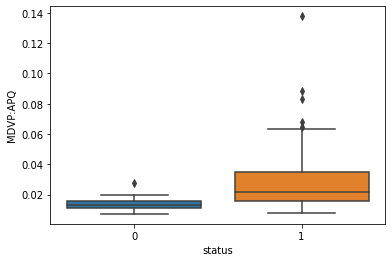

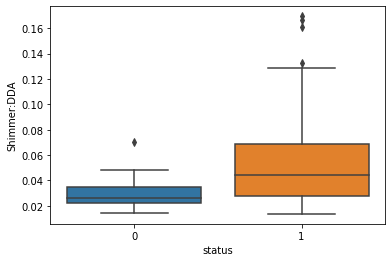

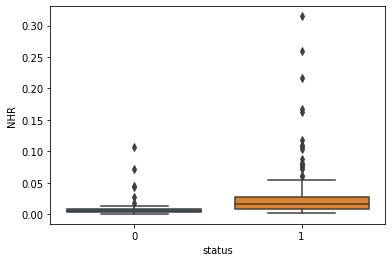

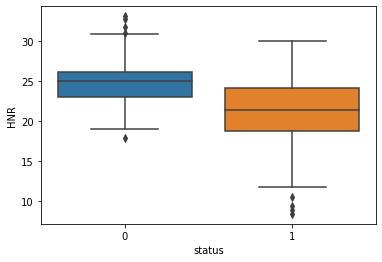

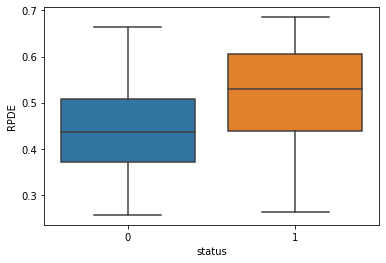

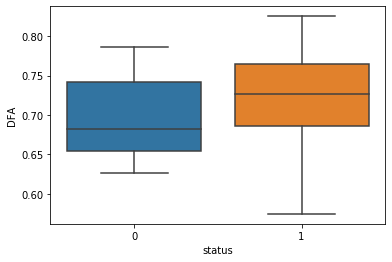

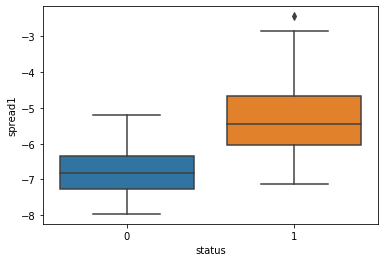

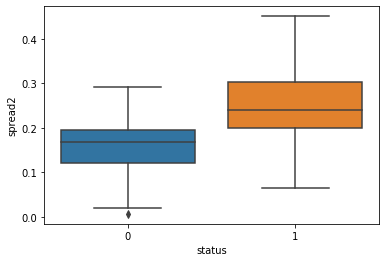

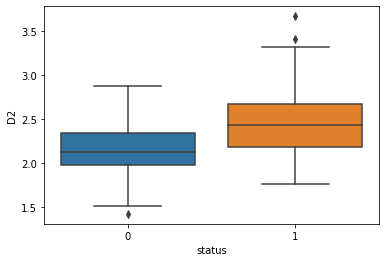

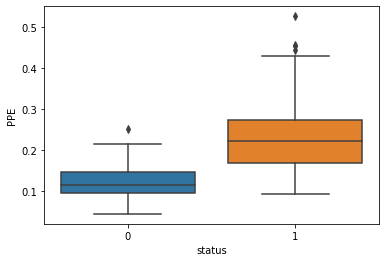

In [26]:
# some feature shows outliers: more analysis and trials can be done here
for feature in df.columns:
    if feature == 'name' or feature == 'status':
        continue
    plt.figure()
    sns.boxplot(x="status", y=feature, data=df)

In [27]:
X = df.drop(['name','status'], axis=1)
y = df['status']

In [28]:
from sklearn.preprocessing import RobustScaler

robustScaler = RobustScaler()
robustScaler.fit(X)
robustScaler.transform(X)

array([[-0.44170744, -0.20736935, -0.52609573, ...,  0.45380827,
        -0.11183061,  0.78423599],
       [-0.40477323, -0.30420962,  0.17054417, ...,  1.11271077,
         0.23323262,  1.51149928],
       [-0.49247665, -0.50052047,  0.1299179 , ...,  0.87990961,
        -0.03586806,  1.19954297],
       ...,
       [ 0.39722687,  0.71831033, -0.5388363 , ..., -0.57618214,
         0.59226119, -0.53946628],
       [ 0.76650766,  2.47509038, -0.52776457, ..., -0.10898759,
        -0.41487316, -0.61236573],
       [ 1.00463211,  0.94521115, -0.47269302, ..., -0.26904136,
         0.36094173, -0.39369336]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True, stratify=y, random_state=0)

In [30]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train,y_train)
print((classifier.score(X_train, y_train), classifier.score(X_test,y_test)))

(1.0, 0.8305084745762712)


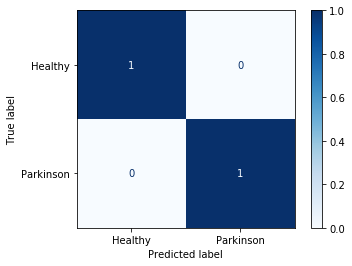

In [31]:
plot_confusion_matrix(classifier, X_train, y_train, normalize='true', cmap='Blues',display_labels=["Healthy","Parkinson"]);

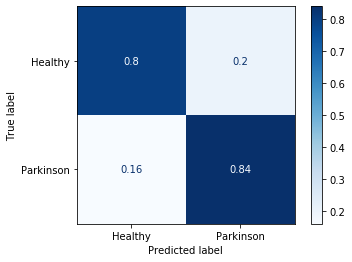

In [32]:
# plot confusion matrix for test set
#
# result is quite good and confusion matrix is balanced
# if "Parkinson" is considered as "positive (P)", since we are talking about an illness
# it is nice that agorithm predicted more FP (predict "Parkinson" to "healthy")
# rather than TN ("Healthy" to "Parkinson")
plot_confusion_matrix(classifier, X_test, y_test,normalize='true', cmap='Blues',display_labels=["Healthy","Parkinson"]);

In [36]:
import optuna

In [37]:
def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["DecisionTree"])
    c_criterion = trial.suggest_categorical("criterion", ["gini","entropy"])
    c_splitter = trial.suggest_categorical("splitter", ["best","random"])
    c_max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    c_min_samples_split = trial.suggest_int("min_samples_split", 2, 20, log=True)
    classifier_obj = DecisionTreeClassifier(criterion=c_criterion, splitter=c_splitter,
        max_depth=c_max_depth, min_samples_split = c_min_samples_split, random_state=0)

    score = cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=10)
    accuracy = score.mean()
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

[I 2021-05-11 08:45:26,032] A new study created in memory with name: no-name-8869a62d-c28b-4ae4-95a1-93fa38ba3fe9
[I 2021-05-11 08:45:42,886] Trial 0 finished with value: 0.7984210526315789 and parameters: {'classifier': 'DecisionTree', 'criterion': 'gini', 'splitter': 'best', 'max_depth': 19, 'min_samples_split': 2}. Best is trial 0 with value: 0.7984210526315789.
[I 2021-05-11 08:45:43,019] Trial 1 finished with value: 0.7539473684210527 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 16}. Best is trial 0 with value: 0.7984210526315789.
[I 2021-05-11 08:45:43,195] Trial 2 finished with value: 0.7626315789473683 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 2}. Best is trial 0 with value: 0.7984210526315789.
[I 2021-05-11 08:45:43,330] Trial 3 finished with value: 0.844736842105263 and parameters: {'classifier': 'DecisionTr

[I 2021-05-11 08:45:45,467] Trial 30 finished with value: 0.8502631578947367 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'max_depth': 10, 'min_samples_split': 2}. Best is trial 10 with value: 0.8607894736842103.
[I 2021-05-11 08:45:45,526] Trial 31 finished with value: 0.8502631578947367 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'max_depth': 22, 'min_samples_split': 2}. Best is trial 10 with value: 0.8607894736842103.
[I 2021-05-11 08:45:45,580] Trial 32 finished with value: 0.8239473684210527 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 2}. Best is trial 10 with value: 0.8607894736842103.
[I 2021-05-11 08:45:45,632] Trial 33 finished with value: 0.8607894736842103 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'max_depth': 18, 'min_samples_split': 3}. Best i

[I 2021-05-11 08:45:47,285] Trial 60 finished with value: 0.795 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'max_depth': 4, 'min_samples_split': 2}. Best is trial 10 with value: 0.8607894736842103.
[I 2021-05-11 08:45:47,365] Trial 61 finished with value: 0.8502631578947367 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 2}. Best is trial 10 with value: 0.8607894736842103.
[I 2021-05-11 08:45:47,463] Trial 62 finished with value: 0.8502631578947367 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'max_depth': 28, 'min_samples_split': 2}. Best is trial 10 with value: 0.8607894736842103.
[I 2021-05-11 08:45:47,556] Trial 63 finished with value: 0.8502631578947367 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'max_depth': 29, 'min_samples_split': 2}. Best is trial 10 wi

[I 2021-05-11 08:45:49,739] Trial 90 finished with value: 0.8502631578947367 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'max_depth': 16, 'min_samples_split': 2}. Best is trial 10 with value: 0.8607894736842103.
[I 2021-05-11 08:45:49,797] Trial 91 finished with value: 0.8607894736842103 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 3}. Best is trial 10 with value: 0.8607894736842103.
[I 2021-05-11 08:45:49,853] Trial 92 finished with value: 0.8607894736842103 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'max_depth': 14, 'min_samples_split': 3}. Best is trial 10 with value: 0.8607894736842103.
[I 2021-05-11 08:45:49,961] Trial 93 finished with value: 0.8607894736842103 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 3}. Best i

FrozenTrial(number=10, values=[0.8607894736842103], datetime_start=datetime.datetime(2021, 5, 11, 8, 45, 43, 946978), datetime_complete=datetime.datetime(2021, 5, 11, 8, 45, 44, 277300), params={'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'max_depth': 29, 'min_samples_split': 3}, distributions={'classifier': CategoricalDistribution(choices=('DecisionTree',)), 'criterion': CategoricalDistribution(choices=('gini', 'entropy')), 'splitter': CategoricalDistribution(choices=('best', 'random')), 'max_depth': IntLogUniformDistribution(high=32, low=2, step=1), 'min_samples_split': IntLogUniformDistribution(high=20, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=10, state=TrialState.COMPLETE, value=None)


In [43]:
# plot best params found
study.best_params

{'classifier': 'DecisionTree',
 'criterion': 'entropy',
 'splitter': 'random',
 'max_depth': 29,
 'min_samples_split': 3}

In [39]:
# classifier with best parameters from optuna
classifier = DecisionTreeClassifier(
    criterion=study.best_params['criterion'],
    splitter=study.best_params['splitter'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    random_state=0)
classifier.fit(X_train,y_train)
print((classifier.score(X_train, y_train), classifier.score(X_test,y_test)))

(0.9926470588235294, 0.7627118644067796)


In [40]:
# this is the best result out of Optuna's study on my pc
# (skip this to plot confusion matrix with parameter found)
classifier = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=28,
    min_samples_split=2,
    random_state=0)
classifier.fit(X_train,y_train)
print((classifier.score(X_train, y_train), classifier.score(X_test,y_test)))

(1.0, 0.847457627118644)


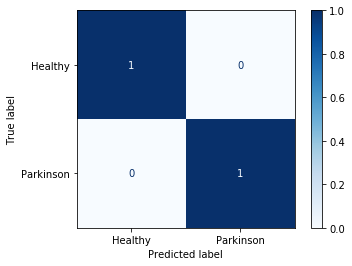

In [41]:
# plot confusion matrix for train set again
plot_confusion_matrix(classifier, X_train,y_train, normalize='true', cmap='Blues',display_labels=["Healthy","Parkinson"]);

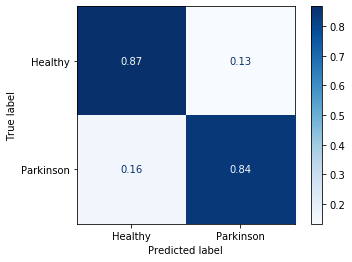

In [42]:
# plot confusion matrix for test set again
# results are slightly better than the original run
plot_confusion_matrix(classifier, X_test, y_test,normalize='true', cmap='Blues',display_labels=["Healthy","Parkinson"]);
